# Problem Setting: Image Classification with hand-written DIGITS.

This notebook demonstrates the standard and simple MobileNetV2 can learn images and discriminates its. Image dataset for this demo is the MNIST. The code of this notebook is written on the premise that the MNIST images are divided and arranged in directories for each label beforehand.

## Problem Solution: MobileNetV2

Firstly, import Python modules for building MobileNetV2.

In [1]:
from accelbrainbase.computableloss._mxnet.l2_norm_loss import L2NormLoss
from accelbrainbase.extractabledata._mxnet.image_extractor import ImageExtractor
from accelbrainbase.iteratabledata._mxnet.labeled_image_iterator import LabeledImageIterator
from accelbrainbase.noiseabledata._mxnet.gauss_noise import GaussNoise
from accelbrainbase.observabledata._mxnet.convolutionalneuralnetworks.mobilenet_v2 import MobileNetV2
from accelbrainbase.observabledata._mxnet.neural_networks import NeuralNetworks

In [3]:
import mxnet as mx
import mxnet.ndarray as nd
import numpy as np
import pandas as pd
from mxnet.gluon.nn import Conv2D

If you want to observe the learning log, set `getLogger`.

In [2]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("accelbrainbase")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

Build and initialize `ImageExtractor`, specifying parameters such as image size.

In [4]:
image_extractor = ImageExtractor(
    # `int` of image width.
    width=28,
    # `int` of image height.
    height=28,
    # `int` of image channel.
    channel=1,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=mx.gpu()
)

Build and initialize `LabeledImageIterator`, delegating `image_extractor` and specifying parameters such as file path to image files.

In [5]:
labeled_image_iterator = LabeledImageIterator(
    # is-a `ImageExtractor`.
    image_extractor=image_extractor,
    # `list` of paths to image files in learning.
    dir_list=[
        "../../../../Downloads/digit-recognizer/train/0/", 
        "../../../../Downloads/digit-recognizer/train/1/", 
        "../../../../Downloads/digit-recognizer/train/2/", 
        "../../../../Downloads/digit-recognizer/train/3/", 
        "../../../../Downloads/digit-recognizer/train/4/", 
        "../../../../Downloads/digit-recognizer/train/5/", 
        "../../../../Downloads/digit-recognizer/train/6/", 
        "../../../../Downloads/digit-recognizer/train/7/", 
        "../../../../Downloads/digit-recognizer/train/8/", 
        "../../../../Downloads/digit-recognizer/train/9/", 
    ],
    # `list` of paths to image files in test.
    test_dir_list=[
        "../../../../Downloads/digit-recognizer/test/0/", 
        "../../../../Downloads/digit-recognizer/test/1/", 
        "../../../../Downloads/digit-recognizer/test/2/", 
        "../../../../Downloads/digit-recognizer/test/3/", 
        "../../../../Downloads/digit-recognizer/test/4/", 
        "../../../../Downloads/digit-recognizer/test/5/", 
        "../../../../Downloads/digit-recognizer/test/6/", 
        "../../../../Downloads/digit-recognizer/test/7/", 
        "../../../../Downloads/digit-recognizer/test/8/", 
        "../../../../Downloads/digit-recognizer/test/9/", 
    ],
    # `int` of epochs.
    epochs=1000,
    # `int` of batch size.
    batch_size=40,
    # How to normalize pixel values of images.
    # - `z_score`: Z-Score normalization.
    # - `min_max`: Min-max normalization.
    # - others : This class will not normalize the data.
    norm_mode="z_score",
    # `float` of scaling factor for data.
    scale=1.0,
    # is-a `NoiseableData`.
    noiseable_data=GaussNoise(sigma=1e-03, mu=0.0),
)

Build and initialize loss function.

In [6]:
computable_loss = mx.gluon.loss.SoftmaxCrossEntropyLoss(sparse_label=False)

Build and initialize `NeuralNetworks` as an output layer and `MobileNetV2` as an input and hidden layers.

In [7]:
output_nn = NeuralNetworks(
    # is-a `ComputableLoss` or `mxnet.gluon.loss`.
    computable_loss=computable_loss,
    # `list` of int` of the number of units in hidden/output layers.
    units_list=[10],
    # `list` of act_type` in `mxnet.ndarray.Activation` or `mxnet.symbol.Activation` in input gate.
    activation_list=["identity"],
    # `list` of `float` of dropout rate.
    dropout_rate_list=[0.0],
    # `list` of `mxnet.gluon.nn.BatchNorm`.
    hidden_batch_norm_list=[None],
    # `bool` for using bias or not in output layer(last hidden layer).
    output_no_bias_flag=True,
    # `bool` for using bias or not in all layer.
    all_no_bias_flag=True,
    # Call `mxnet.gluon.HybridBlock.hybridize()` or not.
    hybridize_flag=True,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=mx.gpu(),
)

In [ ]:
CNN = MobileNetV2(
    # is-a `ComputableLoss` or `mxnet.gluon.loss`.
    computable_loss=computable_loss,
    # is-a `mxnet.initializer.Initializer` for parameters of model. If `None`, it is drawing from the Xavier distribution.
    initializer=None,
    # `float` of learning rate.
    learning_rate=1e-03,
    # `float` of attenuate the `learning_rate` by a factor of this value every `attenuate_epoch`.
    learning_attenuate_rate=1.0,
    # `int` of attenuate the `learning_rate` by a factor of `learning_attenuate_rate` every `attenuate_epoch`.
    attenuate_epoch=50,
    # `int` of the number of filters in input lauer.
    input_filter_n=32,
    # `tuple` or `int` of kernel size in input layer.
    input_kernel_size=(3, 3),
    # `tuple` or `int` of strides in input layer.
    input_strides=(2, 2),
    # `tuple` or `int` of zero-padding in input layer.
    input_padding=(1, 1),
    # `list` of information of bottleneck layers whose `dict` means ...
    # - `filter_rate`: `float` of filter expfilter.
    # - `filter_n`: `int` of the number of filters.
    # - `block_n`: `int` of the number of blocks.
    # - `stride`: `int` or `tuple` of strides.
    bottleneck_dict_list=[
        {
            "filter_rate": 1,
            "filter_n": 32,
            "block_n": 1,
            "stride": 1
        },
        {
            "filter_rate": 1,
            "filter_n": 32,
            "block_n": 2,
            "stride": 1
        },
    ],
    # `int` of the number of filters in hidden layers.
    hidden_filter_n=64,
    # `tuple` or `int` of pooling size in hidden layer.
    # If `None`, the pooling layer will not attatched in hidden layer.
    pool_size=None,
    # is-a `NeuralNetworks` or `mxnet.gluon.block.hybridblock.HybridBlock`.
    output_nn=output_nn,
    # `str` of name of optimizer.
    optimizer_name="adam",
    # Call `mxnet.gluon.HybridBlock.hybridize()` or not.
    hybridize_flag=True,
    # `mx.gpu()` or `mx.cpu()`.
    ctx=mx.gpu(),
)

Start learning.

In [8]:
CNN.learn(labeled_image_iterator)

Epochs: 100 Train loss: 0.07655434 Test loss: 0.18902397
----------------------------------------------------------------------------------------------------
Train accuracy: 1.0 Test accuracy: 0.925
Train infenreced label(inferenced):
[9. 1. 1. 1. 7. 0. 3. 3. 0. 4. 5. 1. 2. 9. 4. 4. 4. 9. 5. 6. 5. 5. 3. 9.
 1. 4. 3. 4. 1. 9. 0. 2. 1. 6. 6. 8. 4. 1. 7. 6.]
Train infenreced label(answer):
[9. 1. 1. 1. 7. 0. 3. 3. 0. 4. 5. 1. 2. 9. 4. 4. 4. 9. 5. 6. 5. 5. 3. 9.
 1. 4. 3. 4. 1. 9. 0. 2. 1. 6. 6. 8. 4. 1. 7. 6.]
Test infenreced label(inferenced):
[4. 9. 2. 1. 8. 9. 5. 4. 4. 1. 8. 9. 5. 4. 3. 7. 3. 9. 3. 3. 9. 2. 4. 8.
 6. 8. 8. 3. 4. 1. 2. 9. 3. 2. 7. 1. 6. 1. 6. 0.]
Test infenreced label(answer):
[6. 9. 2. 1. 8. 9. 5. 4. 4. 1. 8. 9. 5. 4. 3. 7. 3. 7. 3. 3. 9. 2. 4. 0.
 6. 8. 8. 3. 4. 1. 2. 9. 3. 2. 7. 1. 6. 1. 6. 0.]
----------------------------------------------------------------------------------------------------
Epochs: 200 Train loss: 0.16012564 Test loss: 0.14122799
-----------------

----------------------------------------------------------------------------------------------------
Epochs: 1000 Train loss: 0.00045524695 Test loss: 0.2120883
----------------------------------------------------------------------------------------------------
Train accuracy: 1.0 Test accuracy: 0.95
Train infenreced label(inferenced):
[7. 5. 0. 2. 2. 1. 6. 8. 9. 5. 4. 2. 9. 4. 2. 9. 1. 5. 5. 3. 0. 1. 7. 3.
 9. 5. 7. 0. 0. 3. 6. 9. 6. 4. 0. 4. 5. 7. 5. 9.]
Train infenreced label(answer):
[7. 5. 0. 2. 2. 1. 6. 8. 9. 5. 4. 2. 9. 4. 2. 9. 1. 5. 5. 3. 0. 1. 7. 3.
 9. 5. 7. 0. 0. 3. 6. 9. 6. 4. 0. 4. 5. 7. 5. 9.]
Test infenreced label(inferenced):
[8. 1. 3. 9. 9. 0. 4. 1. 3. 7. 0. 2. 9. 2. 0. 8. 5. 2. 5. 4. 1. 3. 1. 0.
 5. 1. 9. 1. 4. 7. 9. 6. 4. 5. 7. 3. 3. 8. 5. 6.]
Test infenreced label(answer):
[8. 1. 5. 9. 9. 0. 4. 1. 3. 7. 0. 2. 9. 2. 0. 8. 5. 2. 5. 4. 1. 3. 1. 0.
 5. 1. 9. 1. 4. 7. 9. 6. 4. 5. 7. 3. 9. 8. 5. 6.]
------------------------------------------------------------------------

Visualize losses and accuracies.

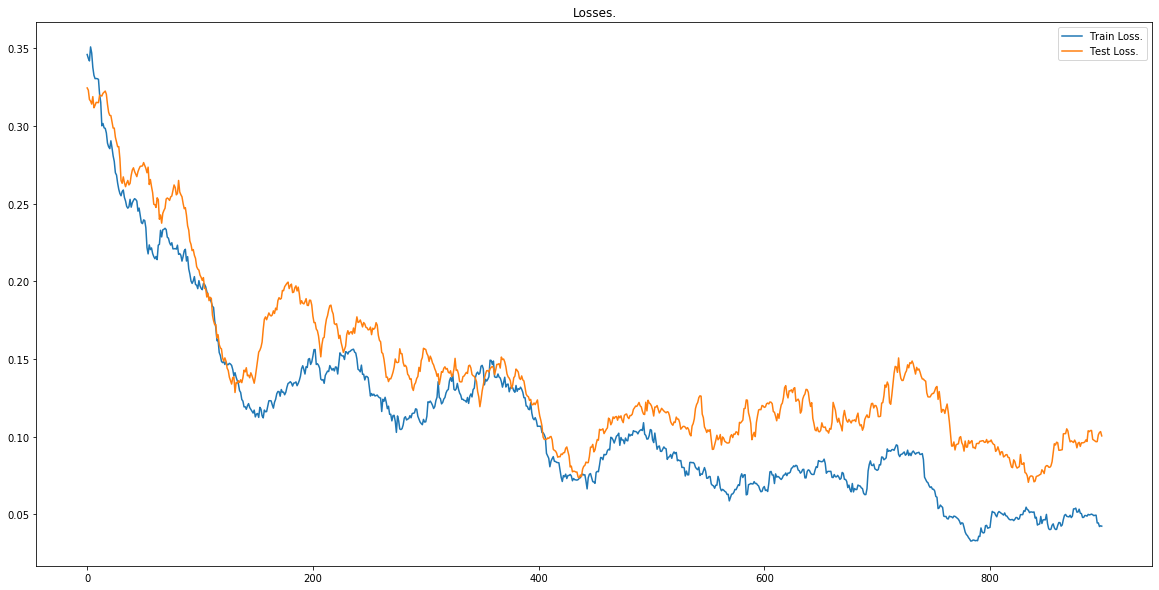

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def moving_avg(arr, window=50):
    return np.convolve(arr, np.ones(window) / window, mode='same')[window:-window]

plt.figure(figsize=(20, 10))
plt.plot(moving_avg(CNN.loss_arr[:, 0]), label="Train Loss.")
plt.plot(moving_avg(CNN.loss_arr[:, 1]), label="Test Loss.")
plt.legend()
plt.title("Losses.")
plt.show()

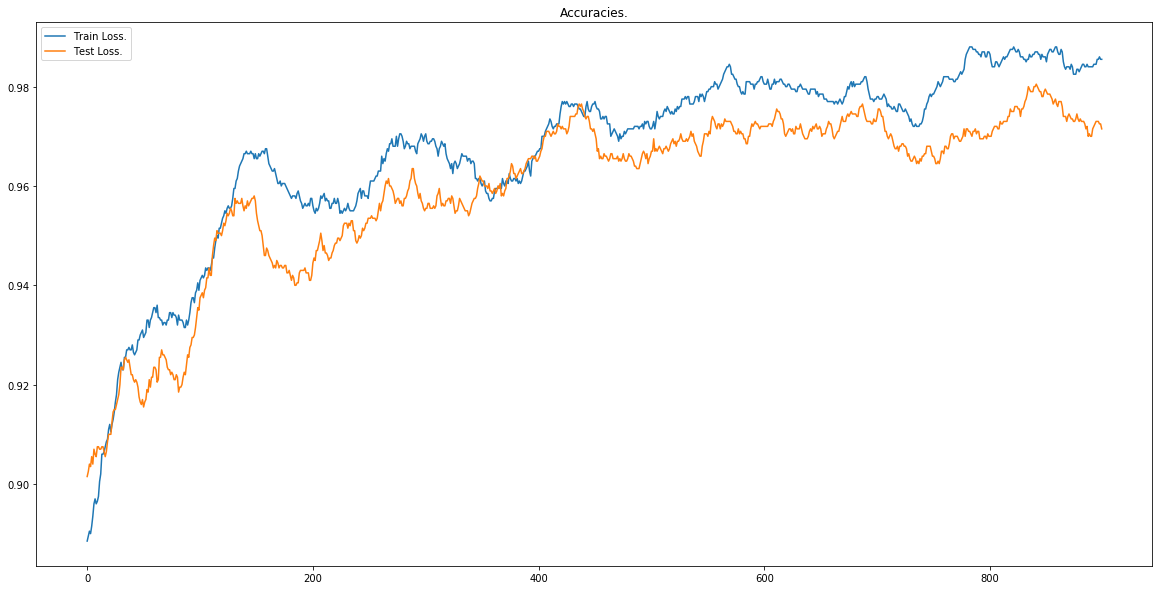

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(moving_avg(CNN.acc_arr[:, 0]), label="Train Loss.")
plt.plot(moving_avg(CNN.acc_arr[:, 1]), label="Test Loss.")
plt.legend()
plt.title("Accuracies.")
plt.show()

As a verification, let's calculate the accuracy of the test data.

In [11]:
test_arr = None
test_label_arr = None
total_acc = 0.0
i = 0
for _, _, _test_arr, _label_test_arr in labeled_image_iterator.generate_learned_samples():
    test_arr = _test_arr
    test_label_arr = _label_test_arr
    prob_arr = CNN.inference(test_arr)
    acc, _, _ = CNN.compute_acc(prob_arr, test_label_arr)
    total_acc += acc
    i += 1
    if i >= 50:
        break
avg_acc = total_acc / i
avg_acc

0.9770000040531158

## For ML Ops.

This model inherits [HybridBlock](https://gluon.mxnet.io/chapter07_distributed-learning/hybridize.html) from [mxnet.gluon](https://mxnet.incubator.apache.org/api/python/docs/api/gluon/index.html). Functions for common ML Ops such as saving and loading parameters are provided by [HybridBlock](https://mxnet.apache.org/api/python/docs/api/gluon/hybrid_block.html).

# References

- He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).
- Howard, A. G., Zhu, M., Chen, B., Kalenichenko, D., Wang, W., Weyand, T., ... & Adam, H. (2017). Mobilenets: Efficient convolutional neural networks for mobile vision applications. arXiv preprint arXiv:1704.04861.
- Sandler, M., Howard, A., Zhu, M., Zhmoginov, A., & Chen, L. C. (2018). Mobilenetv2: Inverted residuals and linear bottlenecks. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 4510-4520).